# OCR pipeline with Keras-OCR library


### What is Keras-ocr?

Keras-ocr is a python package for performing OCR. It implements a Text Detection -> Text Recognition pipeline where Text Detection is done using the CRAFT algorithm published in CVPR-2019 and Text Recognition is done using the CRNN algorithm which was published in TPAMI-2017.

Moreover, the library has quite a few utility functions which help in OCR related tasks. For example, it has functionality for generating bounding boxes, aligning them, annotating images with bounding boxes and text etc.

We had discussed the Text Detection process using CRAFT in the previous notebook. In this notebook, we will discuss the various methods available in keras-ocr to perform Text Recognition.

In [3]:
import numpy
import pandas

# Install Keras-OCR package

In [4]:
!pip install keras-ocr > /dev/null

# Import Libraries

In [55]:
import keras_ocr
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Read Image

In [70]:
image = keras_ocr.tools.read("Tensorflow.png")

# Text Recognition using Keras OCR
The library provides a simple interface for recognizing text.There are 3 options:

1. pipeline for detecting and recognizing text.
2. Recognize text from an image assuming a single text box is present in the image.
3. Recognize text from an image with text bounding boxes for each text box obtained by first passing it through the text detector.

In [71]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


# Create a pipeline Object
You simply create an instance of the pipeline class using the below method.

It will download the text detection model ( CRAFT ) and the text recognition model ( CRNN ) if they are not already present.

In [72]:
prediction_groups = pipeline.recognize([image])

In [73]:
print(prediction_groups)

[[('11', array([[516.7969 , 193.35938],
       [677.34375, 193.35938],
       [677.34375, 330.46875],
       [516.7969 , 330.46875]], dtype=float32)), ('ensorflow', array([[250.65196, 424.1692 ],
       [942.0742 , 422.43625],
       [942.3341 , 526.12744],
       [250.91182, 527.86035]], dtype=float32))]]


In [74]:
predictions = prediction_groups[0]

In [81]:
print(predictions[1])

('ensorflow', array([[250.65196, 424.1692 ],
       [942.0742 , 422.43625],
       [942.3341 , 526.12744],
       [250.91182, 527.86035]], dtype=float32))


# Display

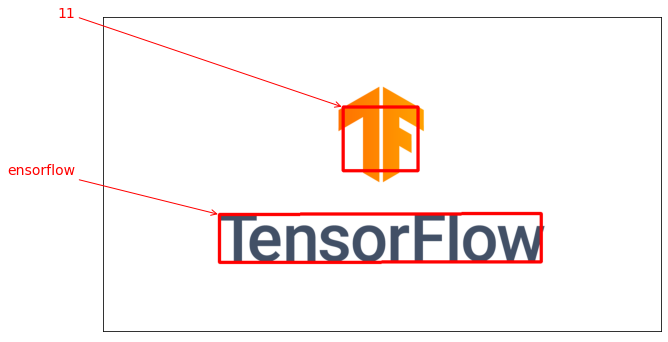

In [77]:
fig,ax = plt.subplots(figsize = [10,10])
keras_ocr.tools.drawAnnotations(image, predictions, ax=ax)

# Recognizer

In [65]:
detector = keras_ocr.detection.Detector()
recognizer = keras_ocr.recognition.Recognizer()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [78]:
image = keras_ocr.tools.read("Tensorflow.png")
detections = detector.detect([image])

In [79]:
recognitions = recognizer.recognize_from_boxes([image],detections)

In [80]:
print(recognitions)

[['11', 'tensorflow']]
